# Case Study: RMS dataset Kaplan Meier analysis.


### This notebook uses a dataset provided by Maja C who studies pediatric oncology patients. 

In [1]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import datetime as dt
%matplotlib inline

 
file = r'RMS tabela final-7.xls'
df = pd.read_excel(file, sheet_name='Sheet2')
df.shape

(189, 24)

In [2]:
#Display first 10 raws of the table

df.head(10)

,zap st,dan,mesec,leto roj,dan.1,mesec.1,leto dg,patol,IRS,mesto,...,"R0,1,2",RT,RT ob relapsu,dan.2,mesec.2,leto smrti,status,dan.3,mesec.3,leto relapsa
0,MB,11.0,2.0,1985.0,7.0,2.0,2000.0,2,4.0,5,...,NaN,1,1.0,4.0,12.0,2000.0,2,NaN,11.0,2000.0
1,KGP,30.0,7.0,1990.0,27.0,2.0,2001.0,3,4.0,5,...,NaN,2,NaN,25.0,8.0,2001.0,2,NaN,NaN,NaN
2,KM,23.0,12.0,1993.0,9.0,5.0,2001.0,1,3.0,2,...,NaN,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
3,SN,20.0,9.0,1999.0,20.0,10.0,2001.0,1,4.0,5,...,1,1,2.0,8.0,1.0,2004.0,2,NaN,9.0,2003.0
4,KK,15.0,12.0,1996.0,1.0,2.0,2002.0,1,1.0,8,...,0,2,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
5,ST,19.0,9.0,1986.0,5.0,8.0,2002.0,1,3.0,2,...,NaN,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
6,HZ,3.0,4.0,2002.0,14.0,2.0,2003.0,1,3.0,7,...,1,2,2.0,NaN,NaN,NaN,1,NaN,2.0,2004.0
7,MM,27.0,1.0,1992.0,27.0,10.0,2003.0,1,3.0,2,...,NaN,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
8,ZI,6.0,11.0,1985.0,3.0,10.0,2003.0,2,3.0,5,...,NaN,1,2.0,24.0,5.0,2004.0,2,NaN,3.0,2004.0
9,KK,22.0,12.0,1988.0,6.0,1.0,2005.0,4,1.0,8,...,1,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN


In [3]:
#Display last 10 raws of the table

df.tail(10)

,zap st,dan,mesec,leto roj,dan.1,mesec.1,leto dg,patol,IRS,mesto,...,"R0,1,2",RT,RT ob relapsu,dan.2,mesec.2,leto smrti,status,dan.3,mesec.3,leto relapsa
179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1=E,NaN,1=H/N,...,R0=0,1=Y,NaN,NaN,NaN,NaN,1=ziv,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2=A,NaN,2=parameningeal,...,R1=1,2=N,NaN,NaN,NaN,NaN,2=mrtev,NaN,NaN,NaN
183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3=ni znano,NaN,3=orbita,...,R2=2,NaN,NaN,NaN,NaN,NaN,3=toksicna smrt,NaN,NaN,NaN
184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"4=spindle, botroid",NaN,4=okoncine,...,R3=3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5=toraks,...,4=ni znano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"6=abdomen, pelvis, retroperitonej",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7=bladder/prostate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"8=testis, uterus, vagina",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleaning and preparing data


In [4]:
## delete rows from 181 to the end row since they contain the legend
df.drop(df.iloc[181:189,].index, inplace=True)

In [5]:
## delete rows that have all values NaN
df.dropna(how="all", inplace=True)

In [6]:
## delete rows from index 170 to index 179 since user cannot get missing data
df.drop(df.iloc[170:179,].index, inplace=True)

In [7]:
#set date of diagnosis to 1 for patients in rows 139-169 according to client (they did not have the date of diagnosis
# but only age at diagnosis)
df['dan.1'].loc[139:170]=1


C:\Users\asustic\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
df.tail(3)

,zap st,dan,mesec,leto roj,dan.1,mesec.1,leto dg,patol,IRS,mesto,...,"R0,1,2",RT,RT ob relapsu,dan.2,mesec.2,leto smrti,status,dan.3,mesec.3,leto relapsa
167,LHRA,23.0,10.0,2012.0,1.0,4.0,2014.0,1,1.0,2,...,0,2,2.0,NaN,NaN,NaN,1,NaN,NaN,2016.0
168,KKAL,19.0,2.0,1999.0,1.0,4.0,2014.0,1,4.0,2,...,NaN,1,NaN,NaN,4.0,2014.0,2,NaN,NaN,NaN
169,IRAF,12.0,11.0,2012.0,1.0,5.0,2014.0,4,3.0,6,...,NaN,2,NaN,NaN,4.0,2014.0,2,NaN,NaN,NaN


### calculate age of patients at diagnosis


In [9]:
#transform month of birth to string
df['mesec'] = df['mesec'].fillna(value=1).astype('int').apply(str)

In [10]:
#transform day of birth to string
df['dan'] = df['dan'].fillna(value=1).astype('int').apply(str)

In [11]:
#transform year of birth to string
df['leto roj'] = df['leto roj'].fillna(value=1).astype('int').apply(str)

In [12]:
#insert new column with date object for DOB
df.insert(4,'rojen', pd.to_datetime(df['leto roj'] + '-' + df['mesec'] + '-' + df['dan']))

In [13]:
#transform month of diagnosis to string
df['mesec.1'] = df['mesec.1'].fillna(value=1).astype('int').apply(str)

In [14]:
#transform day of diagnosis to string
df['dan.1'] = df['dan.1'].fillna(value=1).astype('int').apply(str)

In [15]:
#transform year of diagnosis to string
df['leto dg'] = df['leto dg'].fillna(value=1).astype('int').apply(str)

In [16]:
#insert new column with date object for diagnosis 
df.insert(8,'diagnoza', pd.to_datetime(df['leto dg'] + '-' + df['mesec.1'] + '-' + df['dan.1'], errors = "coerce"))

In [17]:
df.insert(9,'age at diganosis',round((df['diagnoza'] - df['rojen'])/np.timedelta64(1,'Y'),2))

In [18]:
df.shape

(170, 27)

In [19]:
#delete patient who is older then 18 / outlier
df.drop(df.loc[df['age at diganosis']>18].index, inplace=True)

In [20]:

df.shape

(169, 27)

## calculate date of death for status 2 or 3 

In [21]:
# set value for month of death (mesec.2) where it is null to 4 (april)
df.loc[((df['status']==2)|(df['status']==3))&(df['mesec.2'].isnull()),['mesec.2']]=4

In [22]:
# set value for day of death (day.2) where it is null to 1 
df.loc[((df['status']==2)|(df['status']==3))&(df['dan.2'].isnull()),['dan.2']]=1

In [23]:
#transform day of death to string
df.loc[(df['status']==2)|(df['status']==3),['dan.2']]=df.loc[(df['status']==2)|(df['status']==3)]['dan.2'].astype('int').apply(str)

In [24]:
#transform month of death to string
df.loc[(df['status']==2)|(df['status']==3),['mesec.2']]=df.loc[(df['status']==2)|(df['status']==3)]['mesec.2'].astype('int').apply(str)

In [25]:
#transform year of death to string
df.loc[(df['status']==2)|(df['status']==3),['leto smrti']]=df.loc[(df['status']==2)|(df['status']==3)]['leto smrti'].astype('int').apply(str)

In [26]:
#insert new column with date death 
df.insert(23,'datum smrti', pd.to_datetime(df['leto smrti'] + '-' + df['mesec.2'] + '-' + df['dan.2']))

## calculate date of relapse for status "RT at relaps" 1 or 2

In [27]:
# set value for day of relapse to 1 for patients with year of relaps
df.loc[(df['leto relapsa'].notnull())&(df['dan.3'].isnull()),['dan.3']]=1

In [28]:
# set value for month of relapse to 4 for patients with year of relaps
df.loc[(df['leto relapsa'].notnull())&(df['mesec.3'].isnull()),['mesec.3']]=4

In [29]:
#transform day of relaps to string
df.loc[df['leto relapsa'].notnull(),['dan.3']]=df.loc[df['leto relapsa'].notnull()]['dan.3'].astype('int').apply(str)

In [30]:
#transform month of relaps to string
df.loc[df['leto relapsa'].notnull(),['mesec.3']]=df.loc[df['leto relapsa'].notnull()]['mesec.3'].astype('int').apply(str)

In [31]:
#transform year of relaps to string
df.loc[df['leto relapsa'].notnull(),['leto relapsa']]=df.loc[df['leto relapsa'].notnull()]['leto relapsa'].astype('int').apply(str)

In [32]:
#insert new column with date of relaps 
df.insert(28,'datum relapsa', pd.to_datetime(df['leto relapsa'] + '-' + df['mesec.3'] + '-' + df['dan.3']))

In [33]:
df.head(10)

,zap st,dan,mesec,leto roj,rojen,dan.1,mesec.1,leto dg,diagnoza,age at diganosis,...,RT ob relapsu,dan.2,mesec.2,leto smrti,datum smrti,status,dan.3,mesec.3,leto relapsa,datum relapsa
0,MB,11,2,1985,1985-02-11,7,2,2000,2000-02-07,14.99,...,1.0,4,12,2000,2000-12-04,2,1,11,2000,2000-11-01
1,KGP,30,7,1990,1990-07-30,27,2,2001,2001-02-27,10.58,...,NaN,25,8,2001,2001-08-25,2,NaN,NaN,NaN,NaT
2,KM,23,12,1993,1993-12-23,9,5,2001,2001-05-09,7.38,...,NaN,NaN,NaN,NaN,NaT,1,NaN,NaN,NaN,NaT
3,SN,20,9,1999,1999-09-20,20,10,2001,2001-10-20,2.08,...,2.0,8,1,2004,2004-01-08,2,1,9,2003,2003-09-01
4,KK,15,12,1996,1996-12-15,1,2,2002,2002-02-01,5.13,...,NaN,NaN,NaN,NaN,NaT,1,NaN,NaN,NaN,NaT
5,ST,19,9,1986,1986-09-19,5,8,2002,2002-08-05,15.88,...,NaN,NaN,NaN,NaN,NaT,1,NaN,NaN,NaN,NaT
6,HZ,3,4,2002,2002-04-03,14,2,2003,2003-02-14,0.87,...,2.0,NaN,NaN,NaN,NaT,1,1,2,2004,2004-02-01
7,MM,27,1,1992,1992-01-27,27,10,2003,2003-10-27,11.75,...,NaN,NaN,NaN,NaN,NaT,1,NaN,NaN,NaN,NaT
8,ZI,6,11,1985,1985-11-06,3,10,2003,2003-10-03,17.91,...,2.0,24,5,2004,2004-05-24,2,1,3,2004,2004-03-01
9,KK,22,12,1988,1988-12-22,6,1,2005,2005-01-06,16.04,...,NaN,NaN,NaN,NaN,NaT,1,NaN,NaN,NaN,NaT


## Kaplan Meier survival analysis

https://lifelines.readthedocs.io/en/latest/Quickstart.html

In [34]:
df['diagnoza']
df['datum smrti'].isna().sum()

101

In [35]:
from lifelines.utils import datetimes_to_durations
start_dates = df['diagnoza']
end_dates = df['datum smrti']
#https://lifelines.readthedocs.io/en/latest/lifelines.utils.html#lifelines.utils.datetimes_to_durations
#
T, E = datetimes_to_durations(start_dates, end_dates, freq="Y")


C:\Users\asustic\Anaconda3\lib\site-packages\lifelines\utils\__init__.py:630: UserWarning: Warning: some values of start_times are after end_times
  warnings.warn("Warning: some values of start_times are after end_times", UserWarning)


In [36]:
df[df['diagnoza']>df['datum smrti']]

,zap st,dan,mesec,leto roj,rojen,dan.1,mesec.1,leto dg,diagnoza,age at diganosis,...,RT ob relapsu,dan.2,mesec.2,leto smrti,datum smrti,status,dan.3,mesec.3,leto relapsa,datum relapsa
118,67,23,3,1999,1999-03-23,17,6,2001,2001-06-17,2.24,...,1.0,1,4,2001,2001-04-01,2,1,12,2001,2001-12-01
169,IRAF,12,11,2012,2012-11-12,1,5,2014,2014-05-01,1.46,...,NaN,1,4,2014,2014-04-01,2,NaN,NaN,NaN,NaT


In [37]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)  # or, more succinctly, kmf.fit(T, E)

<lifelines.KaplanMeierFitter: fitted with 169 observations, 101 censored>

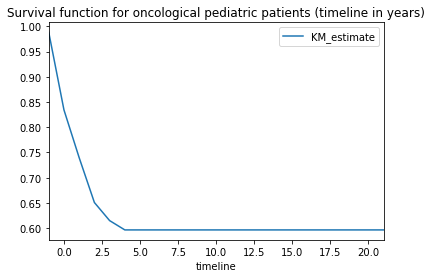

In [38]:
kmf.survival_function_
kmf.survival_function_.plot()
plt.title('Survival function for oncological pediatric patients (timeline in years)');

How do we interpret this? The y-axis represents the probability a patient is still around after t years, where t years is on the x-axis. 

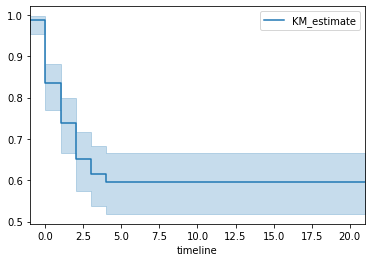

In [39]:
kmf.plot()

The band shows how uncertain we are about these point estimates, i.e., the confidence intervals. 

In [40]:
#how uncertain we are about these point estimates, i.e., we need confidence intervals (CI)

kmf.confidence_interval_

,KM_estimate_upper_0.95,KM_estimate_lower_0.95
-1.0,0.997027,0.953514
0.0,0.882492,0.769143
1.0,0.799170,0.666501
2.0,0.717448,0.573883
3.0,0.683718,0.537235
4.0,0.666258,0.518436
5.0,0.666258,0.518436
6.0,0.666258,0.518436
7.0,0.666258,0.518436
8.0,0.666258,0.518436


In [41]:
print(kmf.survival_function_)

          KM_estimate
timeline             
-1.0         0.988166
 0.0         0.834320
 1.0         0.739645
 2.0         0.650888
 3.0         0.615059
 4.0         0.596607
 5.0         0.596607
 6.0         0.596607
 7.0         0.596607
 8.0         0.596607
 9.0         0.596607
 10.0        0.596607
 11.0        0.596607
 12.0        0.596607
 13.0        0.596607
 14.0        0.596607
 15.0        0.596607
 16.0        0.596607
 17.0        0.596607
 18.0        0.596607
 19.0        0.596607
 21.0        0.596607


### That is, we estimate the probability of a new patient 5 year survival is   59.6285%  and we are 95% confident that the true probability is between 51.8061% and 66.5990%.

In [42]:
# we defined time as the difference between today's date and diagnosys date
# time is in years
# most frequent observation period
np.median(T)

5.0

In [43]:
# mean/average observation period
np.mean(T)

7.005917159763314

In [44]:
# standard deviation for observation period
np.std(T)

6.303466728544795

In [45]:
# minimum observation period
np.min(T)

-1.0

In [46]:
#maximum observation period
np.max(T)

21.0

In [47]:
from lifelines.utils import survival_table_from_events

table = survival_table_from_events(T, E)
print(table)

          removed  observed  censored  entrance  at_risk
event_at                                                
-1.0            2         2         0       169      169
 0.0           26        26         0         0      167
 1.0           16        16         0         0      141
 2.0           16        15         1         0      125
 3.0            9         6         3         0      109
 4.0            8         3         5         0      100
 5.0            9         0         9         0       92
 6.0            6         0         6         0       83
 7.0            9         0         9         0       77
 8.0            8         0         8         0       68
 9.0            6         0         6         0       60
 10.0           5         0         5         0       54
 11.0           3         0         3         0       49
 12.0           3         0         3         0       46
 13.0           6         0         6         0       43
 14.0           7         0    

## Segmenting survival rate for different locations (mesto)

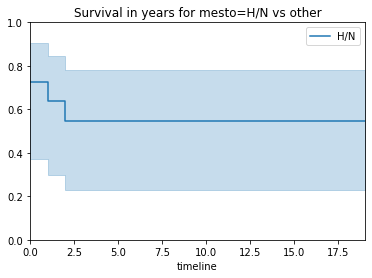

In [48]:
ax = plt.subplot(111)

mesto = (df["mesto"] == 1)

kmf.fit(T[mesto], event_observed=E[mesto], label="H/N")
kmf.plot(ax=ax)

plt.ylim(0, 1);

plt.title("Survival in years for mesto=H/N vs other");




In [49]:
kmf.confidence_interval_


,H/N_upper_0.95,H/N_lower_0.95
0.0,0.902833,0.370787
1.0,0.845163,0.296892
2.0,0.779648,0.228545
4.0,0.779648,0.228545
6.0,0.779648,0.228545
9.0,0.779648,0.228545
10.0,0.779648,0.228545
14.0,0.779648,0.228545
19.0,0.779648,0.228545


In [50]:
print(kmf.survival_function_)

               H/N
timeline          
0.0       0.727273
1.0       0.636364
2.0       0.545455
4.0       0.545455
6.0       0.545455
9.0       0.545455
10.0      0.545455
14.0      0.545455
19.0      0.545455


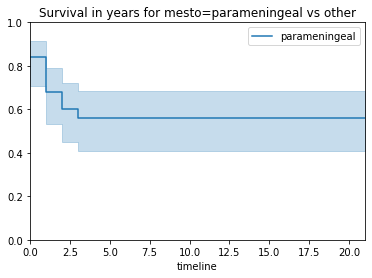

In [51]:
ax = plt.subplot(111)

mesto = (df["mesto"] == 2)

kmf.fit(T[mesto], event_observed=E[mesto], label="parameningeal")
kmf.plot(ax=ax)


plt.ylim(0, 1);
plt.title("Survival in years for mesto=parameningeal vs other");

In [52]:
kmf.confidence_interval_


,parameningeal_upper_0.95,parameningeal_lower_0.95
0.0,0.916570,0.705432
1.0,0.790135,0.531828
2.0,0.720369,0.451320
3.0,0.683206,0.410653
4.0,0.683206,0.410653
5.0,0.683206,0.410653
6.0,0.683206,0.410653
7.0,0.683206,0.410653
8.0,0.683206,0.410653
9.0,0.683206,0.410653


In [53]:
print(kmf.survival_function_)

          parameningeal
timeline               
0.0            0.840000
1.0            0.680000
2.0            0.600000
3.0            0.558621
4.0            0.558621
5.0            0.558621
6.0            0.558621
7.0            0.558621
8.0            0.558621
9.0            0.558621
10.0           0.558621
13.0           0.558621
14.0           0.558621
15.0           0.558621
16.0           0.558621
17.0           0.558621
18.0           0.558621
19.0           0.558621
21.0           0.558621


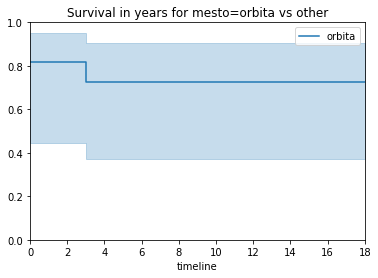

In [54]:
ax = plt.subplot(111)

mesto = (df["mesto"] == 3)

kmf.fit(T[mesto], event_observed=E[mesto], label="orbita")
kmf.plot(ax=ax)


plt.ylim(0, 1);
plt.title("Survival in years for mesto=orbita vs other");

In [55]:
kmf.confidence_interval_


,orbita_upper_0.95,orbita_lower_0.95
0.0,0.951162,0.447429
3.0,0.902833,0.370787
9.0,0.902833,0.370787
10.0,0.902833,0.370787
13.0,0.902833,0.370787
16.0,0.902833,0.370787
18.0,0.902833,0.370787


In [56]:
print(kmf.survival_function_)

            orbita
timeline          
0.0       0.818182
3.0       0.727273
9.0       0.727273
10.0      0.727273
13.0      0.727273
16.0      0.727273
18.0      0.727273


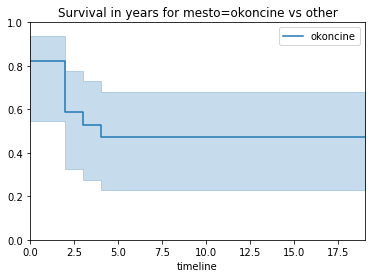

In [57]:
ax = plt.subplot(111)

mesto = (df["mesto"] == 4)

kmf.fit(T[mesto], event_observed=E[mesto], label="okoncine")
kmf.plot(ax=ax)


plt.ylim(0, 1);
plt.title("Survival in years for mesto=okoncine vs other");

In [58]:
print(kmf.survival_function_)

          okoncine
timeline          
0.0       0.823529
2.0       0.588235
3.0       0.529412
4.0       0.470588
5.0       0.470588
8.0       0.470588
9.0       0.470588
12.0      0.470588
16.0      0.470588
17.0      0.470588
19.0      0.470588


In [59]:
kmf.confidence_interval_

,okoncine_upper_0.95,okoncine_lower_0.95
0.0,0.939405,0.547132
2.0,0.778200,0.325368
3.0,0.730267,0.276168
4.0,0.679678,0.229598
5.0,0.679678,0.229598
8.0,0.679678,0.229598
9.0,0.679678,0.229598
12.0,0.679678,0.229598
16.0,0.679678,0.229598
17.0,0.679678,0.229598


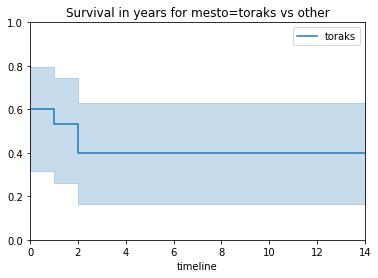

In [60]:
ax = plt.subplot(111)

mesto = (df["mesto"] == 5)

kmf.fit(T[mesto], event_observed=E[mesto], label="toraks")
kmf.plot(ax=ax)


plt.ylim(0, 1);
plt.title("Survival in years for mesto=toraks vs other");

In [61]:
kmf.confidence_interval_

,toraks_upper_0.95,toraks_lower_0.95
0.0,0.796523,0.317587
1.0,0.743766,0.263202
2.0,0.627586,0.164939
4.0,0.627586,0.164939
5.0,0.627586,0.164939
8.0,0.627586,0.164939
12.0,0.627586,0.164939
14.0,0.627586,0.164939


In [62]:
print(kmf.survival_function_)

            toraks
timeline          
0.0       0.600000
1.0       0.533333
2.0       0.400000
4.0       0.400000
5.0       0.400000
8.0       0.400000
12.0      0.400000
14.0      0.400000


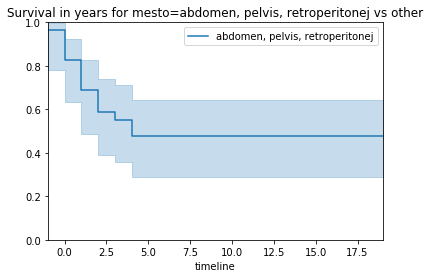

In [63]:
ax = plt.subplot(111)

mesto = (df["mesto"] == 6)

kmf.fit(T[mesto], event_observed=E[mesto], label="abdomen, pelvis, retroperitonej")
kmf.plot(ax=ax)


plt.ylim(0, 1);
plt.title("Survival in years for mesto=abdomen, pelvis, retroperitonej vs other");

In [64]:
kmf.confidence_interval_

,"abdomen, pelvis, retroperitonej_upper_0.95","abdomen, pelvis, retroperitonej_lower_0.95"
-1.0,0.995070,0.779470
0.0,0.924350,0.634286
1.0,0.824809,0.488309
2.0,0.739878,0.387979
3.0,0.709955,0.356125
4.0,0.644827,0.289198
6.0,0.644827,0.289198
7.0,0.644827,0.289198
8.0,0.644827,0.289198
9.0,0.644827,0.289198


In [65]:
print(kmf.survival_function_)

          abdomen, pelvis, retroperitonej
timeline                                 
-1.0                             0.965517
 0.0                             0.827586
 1.0                             0.689655
 2.0                             0.586207
 3.0                             0.551724
 4.0                             0.478161
 6.0                             0.478161
 7.0                             0.478161
 8.0                             0.478161
 9.0                             0.478161
 10.0                            0.478161
 11.0                            0.478161
 14.0                            0.478161
 16.0                            0.478161
 17.0                            0.478161
 19.0                            0.478161


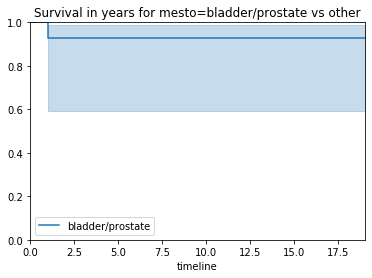

In [66]:
ax = plt.subplot(111)

mesto = (df["mesto"] == 7)

kmf.fit(T[mesto], event_observed=E[mesto], label="bladder/prostate")
kmf.plot(ax=ax)


plt.ylim(0, 1);
plt.title("Survival in years for mesto=bladder/prostate vs other");

In [67]:
kmf.confidence_interval_

,bladder/prostate_upper_0.95,bladder/prostate_lower_0.95
0.0,NaN,NaN
1.0,0.98962,0.590767
6.0,0.98962,0.590767
7.0,0.98962,0.590767
8.0,0.98962,0.590767
12.0,0.98962,0.590767
13.0,0.98962,0.590767
15.0,0.98962,0.590767
16.0,0.98962,0.590767
18.0,0.98962,0.590767


In [68]:
print(kmf.survival_function_)

          bladder/prostate
timeline                  
0.0               1.000000
1.0               0.928571
6.0               0.928571
7.0               0.928571
8.0               0.928571
12.0              0.928571
13.0              0.928571
15.0              0.928571
16.0              0.928571
18.0              0.928571
19.0              0.928571


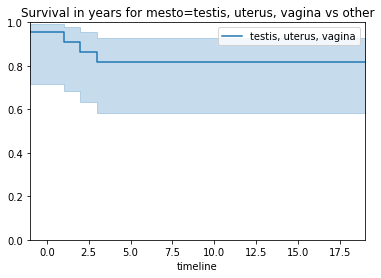

In [69]:
ax = plt.subplot(111)

mesto = (df["mesto"] == 8)

kmf.fit(T[mesto], event_observed=E[mesto], label="testis, uterus, vagina")
kmf.plot(ax=ax)


plt.ylim(0, 1);
plt.title("Survival in years for mesto=testis, uterus, vagina vs other");

In [70]:
kmf.confidence_interval_

,"testis, uterus, vagina_upper_0.95","testis, uterus, vagina_lower_0.95"
-1.0,0.993470,0.718703
1.0,0.976457,0.682979
2.0,0.953863,0.634438
3.0,0.927566,0.585348
4.0,0.927566,0.585348
5.0,0.927566,0.585348
6.0,0.927566,0.585348
7.0,0.927566,0.585348
8.0,0.927566,0.585348
9.0,0.927566,0.585348


In [71]:
print(kmf.survival_function_)

          testis, uterus, vagina
timeline                        
-1.0                    0.954545
 1.0                    0.909091
 2.0                    0.863636
 3.0                    0.818182
 4.0                    0.818182
 5.0                    0.818182
 6.0                    0.818182
 7.0                    0.818182
 8.0                    0.818182
 9.0                    0.818182
 11.0                   0.818182
 13.0                   0.818182
 14.0                   0.818182
 16.0                   0.818182
 17.0                   0.818182
 19.0                   0.818182


## Segmenting OS (overall survival) for:
### 1. META=1
### 2. META=2 AND META=3 
### 3. META=2
### 4. META=3
### 5. RT=1
### 6. RT=2

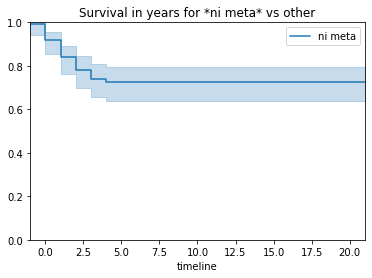

In [72]:
# META=1
ax = plt.subplot(111)

meta = (df["meta"] == 1)

kmf.fit(T[meta], event_observed=E[meta], label="ni meta")
kmf.plot(ax=ax)

plt.ylim(0, 1);

plt.title("Survival in years for *ni meta* vs other");


In [73]:
kmf.confidence_interval_

,ni meta_upper_0.95,ni meta_lower_0.95
-1.0,0.998860,0.944138
0.0,0.955775,0.855302
1.0,0.892782,0.761255
2.0,0.845144,0.698774
3.0,0.809615,0.654768
4.0,0.794892,0.636933
5.0,0.794892,0.636933
6.0,0.794892,0.636933
7.0,0.794892,0.636933
8.0,0.794892,0.636933


In [74]:
print(kmf.survival_function_)

           ni meta
timeline          
-1.0      0.991935
 0.0      0.919355
 1.0      0.838710
 2.0      0.782258
 3.0      0.741515
 4.0      0.724852
 5.0      0.724852
 6.0      0.724852
 7.0      0.724852
 8.0      0.724852
 9.0      0.724852
 10.0     0.724852
 11.0     0.724852
 12.0     0.724852
 13.0     0.724852
 14.0     0.724852
 15.0     0.724852
 16.0     0.724852
 17.0     0.724852
 18.0     0.724852
 19.0     0.724852
 21.0     0.724852


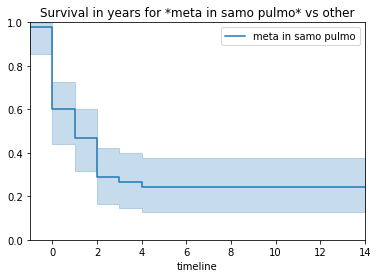

In [75]:
# META=2 AND META=3
ax = plt.subplot(111)

meta = (df["meta"] != 1)

kmf.fit(T[meta], event_observed=E[meta], label="meta in samo pulmo")
kmf.plot(ax=ax)

plt.ylim(0, 1);

plt.title("Survival in years for *meta in samo pulmo* vs other");


In [76]:
kmf.confidence_interval_

,meta in samo pulmo_upper_0.95,meta in samo pulmo_lower_0.95
-1.0,0.996840,0.852533
0.0,0.725986,0.442694
1.0,0.602974,0.317204
2.0,0.423836,0.165932
3.0,0.400069,0.148525
4.0,0.374456,0.129471
5.0,0.374456,0.129471
6.0,0.374456,0.129471
7.0,0.374456,0.129471
9.0,0.374456,0.129471


In [77]:
print(kmf.survival_function_)

          meta in samo pulmo
timeline                    
-1.0                0.977778
 0.0                0.600000
 1.0                0.466667
 2.0                0.288889
 3.0                0.266667
 4.0                0.242424
 5.0                0.242424
 6.0                0.242424
 7.0                0.242424
 9.0                0.242424
 10.0               0.242424
 14.0               0.242424


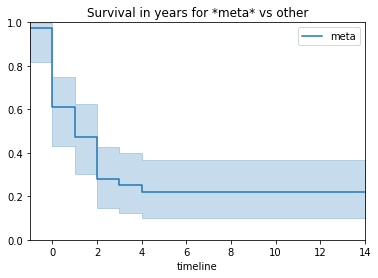

In [78]:
# META=2
ax = plt.subplot(111)

meta = (df["meta"] == 2)

kmf.fit(T[meta], event_observed=E[meta], label="meta")
kmf.plot(ax=ax)

plt.ylim(0, 1);

plt.title("Survival in years for *meta* vs other");


In [79]:
kmf.confidence_interval_

,meta_upper_0.95,meta_lower_0.95
-1.0,0.996040,0.818731
0.0,0.748169,0.433459
1.0,0.622801,0.304569
2.0,0.427813,0.144792
3.0,0.397829,0.124307
4.0,0.364801,0.101204
5.0,0.364801,0.101204
6.0,0.364801,0.101204
7.0,0.364801,0.101204
9.0,0.364801,0.101204


In [80]:
print(kmf.survival_function_)

              meta
timeline          
-1.0      0.972222
 0.0      0.611111
 1.0      0.472222
 2.0      0.277778
 3.0      0.250000
 4.0      0.218750
 5.0      0.218750
 6.0      0.218750
 7.0      0.218750
 9.0      0.218750
 10.0     0.218750
 14.0     0.218750


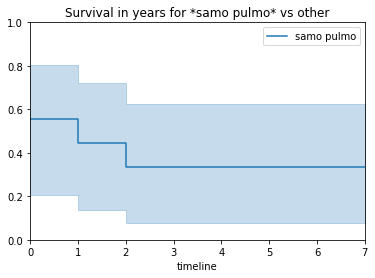

In [81]:
# META=3
ax = plt.subplot(111)

meta = (df["meta"] ==3)

kmf.fit(T[meta], event_observed=E[meta], label="samo pulmo")
kmf.plot(ax=ax)

plt.ylim(0, 1);

plt.title("Survival in years for *samo pulmo* vs other");

In [82]:
kmf.confidence_interval_

,samo pulmo_upper_0.95,samo pulmo_lower_0.95
0.0,0.804525,0.204242
1.0,0.719315,0.135872
2.0,0.622627,0.078289
4.0,0.622627,0.078289
6.0,0.622627,0.078289
7.0,0.622627,0.078289


In [83]:
print(kmf.survival_function_)

          samo pulmo
timeline            
0.0         0.555556
1.0         0.444444
2.0         0.333333
4.0         0.333333
6.0         0.333333
7.0         0.333333


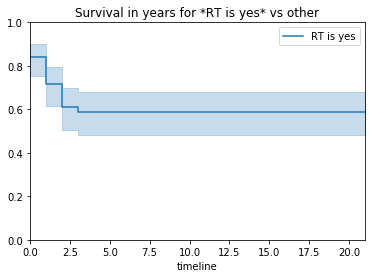

In [84]:
# RT=1
ax = plt.subplot(111)

rt = (df["RT"] ==1)

kmf.fit(T[rt], event_observed=E[rt], label="RT is yes")
kmf.plot(ax=ax)

plt.ylim(0, 1);

plt.title("Survival in years for *RT is yes* vs other");

In [85]:
kmf.confidence_interval_

,RT is yes_upper_0.95,RT is yes_lower_0.95
0.0,0.901642,0.751839
1.0,0.795407,0.613588
2.0,0.700232,0.504965
3.0,0.680341,0.483370
4.0,0.680341,0.483370
5.0,0.680341,0.483370
6.0,0.680341,0.483370
7.0,0.680341,0.483370
8.0,0.680341,0.483370
9.0,0.680341,0.483370


In [86]:
print(kmf.survival_function_)

          RT is yes
timeline           
0.0        0.842105
1.0        0.715789
2.0        0.610526
3.0        0.589104
4.0        0.589104
5.0        0.589104
6.0        0.589104
7.0        0.589104
8.0        0.589104
9.0        0.589104
10.0       0.589104
11.0       0.589104
12.0       0.589104
13.0       0.589104
14.0       0.589104
15.0       0.589104
16.0       0.589104
17.0       0.589104
18.0       0.589104
19.0       0.589104
21.0       0.589104


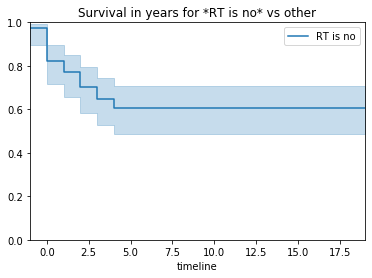

In [87]:
# RT=2
ax = plt.subplot(111)

rt = (df["RT"] ==2)

kmf.fit(T[rt], event_observed=E[rt], label="RT is no")
kmf.plot(ax=ax)

plt.ylim(0, 1);

plt.title("Survival in years for *RT is no* vs other");

In [88]:
kmf.confidence_interval_

,RT is no_upper_0.95,RT is no_lower_0.95
-1.0,0.993171,0.896230
0.0,0.893970,0.716775
1.0,0.850405,0.656762
2.0,0.793095,0.584499
3.0,0.745396,0.528525
4.0,0.708676,0.487499
5.0,0.708676,0.487499
6.0,0.708676,0.487499
7.0,0.708676,0.487499
8.0,0.708676,0.487499


In [89]:
print(kmf.survival_function_)

          RT is no
timeline          
-1.0      0.972973
 0.0      0.824324
 1.0      0.770270
 2.0      0.702703
 3.0      0.648649
 4.0      0.608108
 5.0      0.608108
 6.0      0.608108
 7.0      0.608108
 8.0      0.608108
 9.0      0.608108
 10.0     0.608108
 11.0     0.608108
 13.0     0.608108
 14.0     0.608108
 15.0     0.608108
 16.0     0.608108
 17.0     0.608108
 18.0     0.608108
 19.0     0.608108


## Kaplan Meier survival analysis event free survival (EFS)


In [90]:
start_dates = df['diagnoza']
end_dates_relaps = df['datum relapsa']
#https://lifelines.readthedocs.io/en/latest/lifelines.utils.html#lifelines.utils.datetimes_to_durations
#
TR, ER = datetimes_to_durations(start_dates, end_dates_relaps, freq="Y")

In [91]:
kmf.fit(TR, event_observed=ER)  # fit Kaplan Meier for relaps

<lifelines.KaplanMeierFitter: fitted with 169 observations, 102 censored>

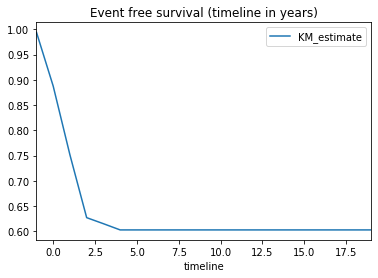

In [92]:
kmf.survival_function_
kmf.survival_function_.plot()
plt.title('Event free survival (timeline in years)');

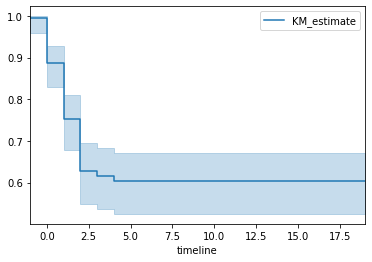

In [93]:
kmf.plot()

In [94]:
kmf.confidence_interval_

,KM_estimate_upper_0.95,KM_estimate_lower_0.95
-1.0,0.999164,0.958744
0.0,0.926768,0.829422
1.0,0.809831,0.679087
2.0,0.695184,0.549661
3.0,0.683893,0.537486
4.0,0.672264,0.524932
5.0,0.672264,0.524932
6.0,0.672264,0.524932
7.0,0.672264,0.524932
8.0,0.672264,0.524932


In [95]:
print(kmf.survival_function_)

          KM_estimate
timeline             
-1.0         0.994083
 0.0         0.887574
 1.0         0.751479
 2.0         0.627219
 3.0         0.615272
 4.0         0.602966
 5.0         0.602966
 6.0         0.602966
 7.0         0.602966
 8.0         0.602966
 9.0         0.602966
 10.0        0.602966
 11.0        0.602966
 12.0        0.602966
 13.0        0.602966
 14.0        0.602966
 15.0        0.602966
 16.0        0.602966
 17.0        0.602966
 18.0        0.602966
 19.0        0.602966


## Segmenting EFS (event free survival) for:
### 1. META=1
### 2. META=2 AND META=3 
### 3. META=2
### 4. META=3
### 5. RT=1
### 6. RT=2

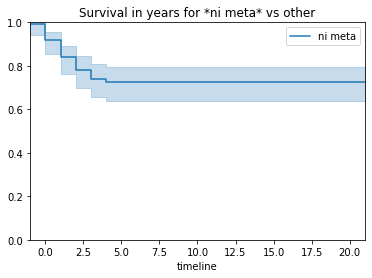

In [96]:
# META=1
ax = plt.subplot(111)

meta = (df["meta"] == 1)

kmf.fit(T[meta], event_observed=E[meta], label="ni meta")
kmf.plot(ax=ax)

plt.ylim(0, 1);

plt.title("Survival in years for *ni meta* vs other");


In [97]:
kmf.confidence_interval_

,ni meta_upper_0.95,ni meta_lower_0.95
-1.0,0.998860,0.944138
0.0,0.955775,0.855302
1.0,0.892782,0.761255
2.0,0.845144,0.698774
3.0,0.809615,0.654768
4.0,0.794892,0.636933
5.0,0.794892,0.636933
6.0,0.794892,0.636933
7.0,0.794892,0.636933
8.0,0.794892,0.636933


In [98]:
print(kmf.survival_function_)

           ni meta
timeline          
-1.0      0.991935
 0.0      0.919355
 1.0      0.838710
 2.0      0.782258
 3.0      0.741515
 4.0      0.724852
 5.0      0.724852
 6.0      0.724852
 7.0      0.724852
 8.0      0.724852
 9.0      0.724852
 10.0     0.724852
 11.0     0.724852
 12.0     0.724852
 13.0     0.724852
 14.0     0.724852
 15.0     0.724852
 16.0     0.724852
 17.0     0.724852
 18.0     0.724852
 19.0     0.724852
 21.0     0.724852


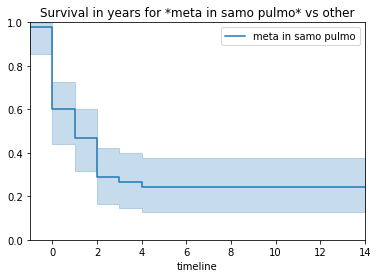

In [99]:
# META=2 AND META=3
ax = plt.subplot(111)

meta = (df["meta"] != 1)

kmf.fit(T[meta], event_observed=E[meta], label="meta in samo pulmo")
kmf.plot(ax=ax)

plt.ylim(0, 1);

plt.title("Survival in years for *meta in samo pulmo* vs other");


In [100]:
kmf.confidence_interval_

,meta in samo pulmo_upper_0.95,meta in samo pulmo_lower_0.95
-1.0,0.996840,0.852533
0.0,0.725986,0.442694
1.0,0.602974,0.317204
2.0,0.423836,0.165932
3.0,0.400069,0.148525
4.0,0.374456,0.129471
5.0,0.374456,0.129471
6.0,0.374456,0.129471
7.0,0.374456,0.129471
9.0,0.374456,0.129471


In [101]:
print(kmf.survival_function_)

          meta in samo pulmo
timeline                    
-1.0                0.977778
 0.0                0.600000
 1.0                0.466667
 2.0                0.288889
 3.0                0.266667
 4.0                0.242424
 5.0                0.242424
 6.0                0.242424
 7.0                0.242424
 9.0                0.242424
 10.0               0.242424
 14.0               0.242424


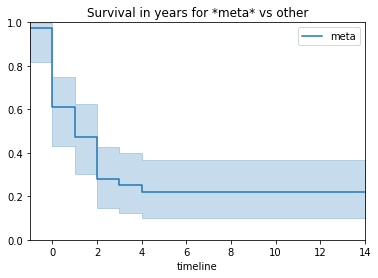

In [102]:
# META=2
ax = plt.subplot(111)

meta = (df["meta"] == 2)

kmf.fit(T[meta], event_observed=E[meta], label="meta")
kmf.plot(ax=ax)

plt.ylim(0, 1);

plt.title("Survival in years for *meta* vs other");


In [103]:
kmf.confidence_interval_

,meta_upper_0.95,meta_lower_0.95
-1.0,0.996040,0.818731
0.0,0.748169,0.433459
1.0,0.622801,0.304569
2.0,0.427813,0.144792
3.0,0.397829,0.124307
4.0,0.364801,0.101204
5.0,0.364801,0.101204
6.0,0.364801,0.101204
7.0,0.364801,0.101204
9.0,0.364801,0.101204


In [104]:
print(kmf.survival_function_)

              meta
timeline          
-1.0      0.972222
 0.0      0.611111
 1.0      0.472222
 2.0      0.277778
 3.0      0.250000
 4.0      0.218750
 5.0      0.218750
 6.0      0.218750
 7.0      0.218750
 9.0      0.218750
 10.0     0.218750
 14.0     0.218750


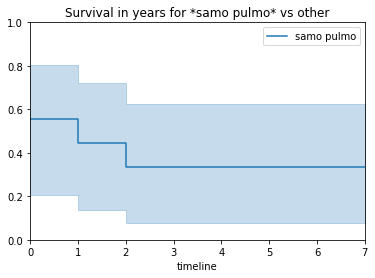

In [105]:
# META=3
ax = plt.subplot(111)

meta = (df["meta"] ==3)

kmf.fit(T[meta], event_observed=E[meta], label="samo pulmo")
kmf.plot(ax=ax)

plt.ylim(0, 1);

plt.title("Survival in years for *samo pulmo* vs other");

In [106]:
kmf.confidence_interval_

,samo pulmo_upper_0.95,samo pulmo_lower_0.95
0.0,0.804525,0.204242
1.0,0.719315,0.135872
2.0,0.622627,0.078289
4.0,0.622627,0.078289
6.0,0.622627,0.078289
7.0,0.622627,0.078289


In [107]:
print(kmf.survival_function_)

          samo pulmo
timeline            
0.0         0.555556
1.0         0.444444
2.0         0.333333
4.0         0.333333
6.0         0.333333
7.0         0.333333


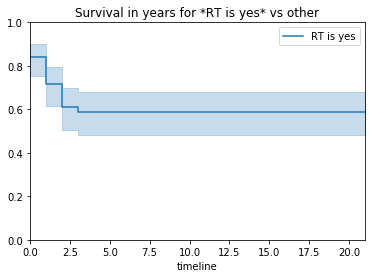

In [108]:
# RT=1
ax = plt.subplot(111)

rt = (df["RT"] ==1)

kmf.fit(T[rt], event_observed=E[rt], label="RT is yes")
kmf.plot(ax=ax)

plt.ylim(0, 1);

plt.title("Survival in years for *RT is yes* vs other");

In [109]:
kmf.confidence_interval_

,RT is yes_upper_0.95,RT is yes_lower_0.95
0.0,0.901642,0.751839
1.0,0.795407,0.613588
2.0,0.700232,0.504965
3.0,0.680341,0.483370
4.0,0.680341,0.483370
5.0,0.680341,0.483370
6.0,0.680341,0.483370
7.0,0.680341,0.483370
8.0,0.680341,0.483370
9.0,0.680341,0.483370


In [110]:
print(kmf.survival_function_)

          RT is yes
timeline           
0.0        0.842105
1.0        0.715789
2.0        0.610526
3.0        0.589104
4.0        0.589104
5.0        0.589104
6.0        0.589104
7.0        0.589104
8.0        0.589104
9.0        0.589104
10.0       0.589104
11.0       0.589104
12.0       0.589104
13.0       0.589104
14.0       0.589104
15.0       0.589104
16.0       0.589104
17.0       0.589104
18.0       0.589104
19.0       0.589104
21.0       0.589104


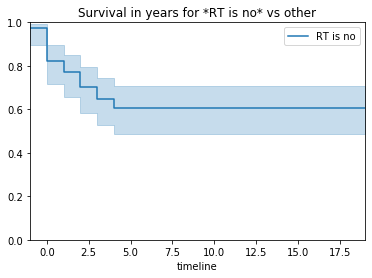

In [111]:
# RT=2
ax = plt.subplot(111)

rt = (df["RT"] ==2)

kmf.fit(T[rt], event_observed=E[rt], label="RT is no")
kmf.plot(ax=ax)

plt.ylim(0, 1);

plt.title("Survival in years for *RT is no* vs other");

In [112]:
kmf.confidence_interval_

,RT is no_upper_0.95,RT is no_lower_0.95
-1.0,0.993171,0.896230
0.0,0.893970,0.716775
1.0,0.850405,0.656762
2.0,0.793095,0.584499
3.0,0.745396,0.528525
4.0,0.708676,0.487499
5.0,0.708676,0.487499
6.0,0.708676,0.487499
7.0,0.708676,0.487499
8.0,0.708676,0.487499


In [113]:
print(kmf.survival_function_)

          RT is no
timeline          
-1.0      0.972973
 0.0      0.824324
 1.0      0.770270
 2.0      0.702703
 3.0      0.648649
 4.0      0.608108
 5.0      0.608108
 6.0      0.608108
 7.0      0.608108
 8.0      0.608108
 9.0      0.608108
 10.0     0.608108
 11.0     0.608108
 13.0     0.608108
 14.0     0.608108
 15.0     0.608108
 16.0     0.608108
 17.0     0.608108
 18.0     0.608108
 19.0     0.608108
